https://medium.com/@datamonsters/text-preprocessing-in-python-steps-tools-and-examples-bf025f872908

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
!ls ../data

science.bz     science.xml.gz


In [3]:
import gzip
with gzip.open('../data/science.xml.gz', 'rb') as f:
    xmlstring = f.read()

In [4]:
from lxml import html

In [5]:
tree = html.fromstring(xmlstring)

In [6]:
abstracts = list(filter(lambda x: x.tag=='abstract_text', list(tree.iter())))

In [7]:
abstracts = list(map(lambda x: x.text_content(), abstracts))

In [8]:
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

notallowed = {'a','the','of','and','in','is','that','for','this','was','by','are','at',
              'an','it','to','on','as','if','is','by','for','not','no','all','than','be',
              'or', 'has', 'been', 'their', 'may', 'such',
              'q','w','e','r','t','y','u','i','o','p','s','d','f','g','h','j','k','l',
              'z','x','c','v','b','n','m','but','can','had','have','here','into', 'ii',
              'our','we','show','these','use','used','using','were','which','with','from'}

def preprocess(x):
    tokens = word_tokenize(x)
    words = list(filter(lambda w: w.isalpha(), tokens))
    words = list(map(lambda x: x.lower(), words))
    #porter = PorterStemmer()
    #words = list(map(lambda word: porter.stem(word), words))    
    words = list(filter(lambda x: x not in notallowed, words))
    return ' '.join(words)

In [9]:
text = list(map(preprocess, abstracts))

- Number of unique words
- Topic (i.e. research field)
- Title
- Number of authors
- Date


- Keywords?
- Author names?

# abstracts

In [10]:
journals = tree.getchildren()[1].getchildren()

In [11]:
journals[0].getchildren()[1].getchildren()[1].getchildren()[-1].getchildren()[0].text_content()

'\\n                        \\n                            Up to 50% of the increase in marine animal biodiversity through the Cenozoic at the genus level has been attributed to a sampling bias termed "the Pull of the Recent," the extension of stratigraphic ranges of fossil taxa by the relatively complete sampling of the Recent biota. However, 906 of 958 living genera and subgenera of bivalve mollusks having a fossil record occur in the Pliocene or Pleistocene. The Pull of the Recent thus accounts for only 5% of the Cenozoic increase in bivalve diversity, a major component of the marine record, suggesting that the diversity increase is likely to be a genuine biological pattern.\\n                        \\n                    '

In [12]:
def abstract_func(x):
    try:
        return x.find('static_data').find('fullrecord_metadata').find('abstracts').text_content()   
    except:
        return ''
full_abstracts = list(map(abstract_func, journals))

In [13]:
full_abstracts[2]

'\\n                    \\n                        \\n                            A persistent reversal in the expected polarity of the initiation of vertically polarized shear waves that graze the D" layer (the layer at the boundary between the outer core and the lower mantle of Earth) in some regions starts at the arrival time of horizontally polarized shear waves. Full waveform modeling of the split shear waves for paths beneath the Caribbean requires azimuthal anisotropy at the base of the mantle. Models with laterally coherent patterns of transverse isotropy with the hexagonal symmetry axis of the mineral phases tilted from the vertical by as much as 20degrees are consistent with the data. Small-scale convection cells within the mantle above the D" layer may cause the observed variations by inducing laterally variable crystallographic or shape-preferred orientation in minerals in the D" layer.\\n                        \\n                    \\n                '

In [14]:
processed_abstracts = list(map(preprocess, full_abstracts))

In [15]:
def title_func(x):    
    return x.find('static_data').find('summary').find('titles').getchildren()[-1].text_content()
titles = list(map(title_func, journals))

In [16]:
journals[-1].find('static_data').find('summary').find('titles').getchildren()[-1].text_content()

'NEUROSCIENCE Dynamics of cortical dendritic membrane potential and spikes in freely behaving rats'

In [17]:
journals[0].find('static_data').find('item').find('bib_id').text_content()

'300 (5622): 1133-1135 MAY 16 2003'

# unique words

In [18]:
character_count = list(map(lambda x: len(preprocess(x)), full_abstracts))

# keywords

In [19]:
journals[0].getchildren()[1].getchildren()[-1].getchildren()[-1].text_content()

'\\n                    FOSSIL RECORD\\n                    BIODIVERSITY\\n                    DIVERSIFICATION\\n                    ORIGINATION\\n                    EXTINCTION\\n                    PAST\\n                '

# number of authors

In [20]:
journals[0].getchildren()[1].getchildren()[0].getchildren()[3].getchildren()

[<Element name at 0x1463449a8>,
 <Element name at 0x1463449f8>,
 <Element name at 0x146344818>,
 <Element name at 0x146344a98>,
 <Element name at 0x146344ae8>]

In [21]:
def num_authors_func(x):
    try:
        return len(x.getchildren()[1].getchildren()[0].getchildren()[3].getchildren())
    except:
        return -1
num_authors = list(map(num_authors_func, journals))

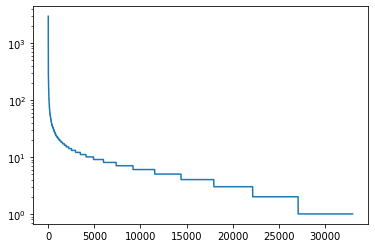

In [22]:
import matplotlib.pyplot as plt
plt.plot(sorted(num_authors)[::-1])
plt.yscale('log')

# Year

In [23]:
journals[0].getchildren()[1].getchildren()[-1].getchildren()[1].text_content().split(' ')[-1]

'2003'

In [24]:
def year_func(x):
    try:
        return x.find('static_data').find('item').find('bib_id').text_content().split(' ')[-1 ]
    except:
        return 'None'

years = list(map(year_func, journals))

In [25]:
journals[2].getchildren()

[<Element uid at 0x146f39728>,
 <Element static_data at 0x146f398b8>,
 <Element dynamic_data at 0x146f39db8>]

In [26]:
years[:10]

['2003',
 '2000',
 '2004',
 '2000',
 '2015',
 '1993',
 '2005',
 '1992',
 '1999',
 '2003']

In [27]:
len(years)

33012

In [28]:
len(num_authors)

33012

In [29]:
len(character_count)

33012

In [30]:
len(abstracts)

22496

In [31]:
len(full_abstracts)

33012

In [32]:
import seaborn as sns
from collections import Counter
x = np.array(list(map(lambda x: len(x.split(' ')), processed_abstracts)))

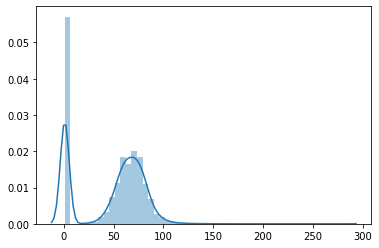

In [33]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
_ = sns.distplot(x, ax=ax)

In [34]:
idx = x > 30 # filter out abstracts less than 30 characters
filtered_abstracts = list(np.array(processed_abstracts)[idx])

# Model selection

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


# https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/
count_vect = CountVectorizer()
dtm_tf = count_vect.fit_transform(filtered_abstracts)

In [36]:
n=5
lda_tf = LatentDirichletAllocation(n_components=n, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda_tf.fit(dtm_tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
# https://markroxor.github.io/gensim/static/notebooks/gensim_news_classification.html#topic=0&lambda=1&term=
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, count_vect)

In [ ]:
import umap
topic_props = lda_tf.transform(dtm_tf)
T = np.log(topic_props)
Y = T - T.mean(axis=1).reshape(-1, 1)
Y = Y - Y.mean(axis=0)
umap_model = umap.UMAP(n_neighbors=20, metric='euclidean')
umap_model.fit(Y)

In [ ]:
embedding = umap_model.transform(Y)

In [ ]:
plt.scatter(embedding[:, 0], embedding[:, 1], s=1)

In [ ]:
params = {'tsne': embedding, 'lda': lda_tf, 'wfreq': dtm_tf, 'terms': count_vect}

In [ ]:
import pickle
with open('../results/params_dump.bin', 'wb') as fp:
    pickle.dump(params, fp)